# 散布図 (matplotlib)

- 2022-01-29 "Suguru Yamamoto \<sgryjp@gmail.com\>"

2 次元の散布図は 2 つの変数間の関係を可視化する。

In [1]:
import matplotlib.pyplot as plt
import matplotlib_inline
import numpy as np
import pandas as pd
from vega_datasets import data

plt.style.use("default")
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")
pd.set_option("display.max_rows", 7)

## プロットに使うデータをロード

In [2]:
cars = data("cars")
cars

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
...,...,...,...,...,...,...,...,...,...
403,dodge rampage,32.0,4,135.0,84.0,2295,11.6,1982-01-01,USA
404,ford ranger,28.0,4,120.0,79.0,2625,18.6,1982-01-01,USA
405,chevy s-10,31.0,4,119.0,82.0,2720,19.4,1982-01-01,USA


## 2 つの数値配列でプロットする

散布図のプロットは [`matplotlib.Axes.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html) で行うのが基本形。第一引数 `x` と第二引数 `y` に同じ長さの数値配列を指定すれば、`x` を横軸 `y` を縦軸にマッピングして散布図を描いてくれる。

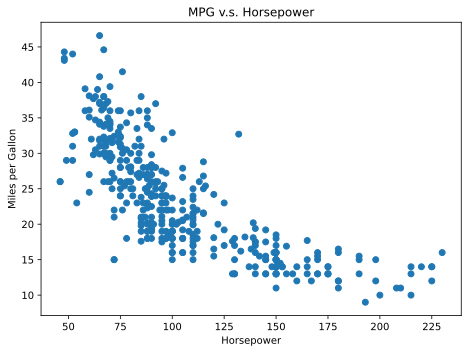

In [3]:
x = np.array(cars["Horsepower"])
y = np.array(cars["Miles_per_Gallon"])

fig, ax = plt.subplots(constrained_layout=True)
ax.scatter(x, y)
ax.xaxis.set_label_text("Horsepower")  # ax.set_xlabel() でも可
ax.yaxis.set_label_text("Miles per Gallon")  # ax.set_ylabel() でも可
ax.set_title("MPG v.s. Horsepower")
plt.show()

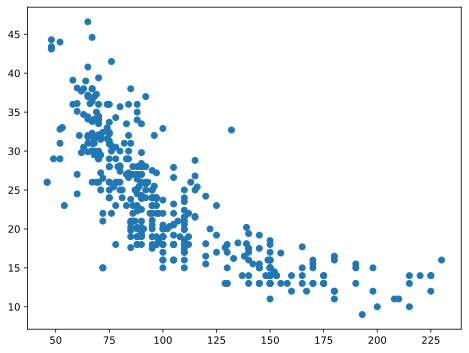

In [4]:
fig, ax = plt.subplots(constrained_layout=True)
ax.scatter(x="Horsepower", y="Miles_per_Gallon", data=cars)
# ax.xaxis.set_label_text("Horsepower")  # ax.set_xlabel() でも可
# ax.yaxis.set_label_text("Miles per Gallon")  # ax.set_ylabel() でも可
# ax.set_title("MPG v.s. Horsepower")
plt.show()

## マーカーの形やサイズを変える

散布図のデータ点を表すマーカーの形は `marker` 引数で変更できる。

また、マーカーのサイズは `s` 引数に各点のサイズを格納した配列を渡すことで個別に変更できる。単純に好みのサイズでマーカーを描きたい場合は数値一つでサイズを指定すれば良い。また `x` や `y` に指定した数値列と同じ長さの数値列を指定すれば個々のマーカーのサイズを指定できる。これは、縦軸・横軸にマッピングした変数以外の変数をマーカーの大きさにマッピングできる（その変数が大きいほどマーカーのサイズも大きくなる）と言うこともできる。

- [（参考）マーカーの種類一覧](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers)

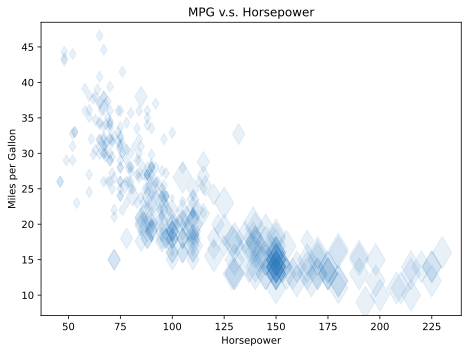

In [5]:
x = np.array(cars["Horsepower"])
y = np.array(cars["Miles_per_Gallon"])
cylinders = np.array(cars["Cylinders"])
cylinders = cylinders ** 3  # シリンダ数＝サイズとすると小さすぎるので大きくする

fig, ax = plt.subplots(constrained_layout=True)
ax.scatter(
    x,
    y,
    marker="d",  # ダイアモンド形
    s=cylinders,  # シリンダー数に応じて点の大きさを変える
    alpha=0.1,  # 点が重なると見にくいので10%の半透明にする
)
ax.xaxis.set_label_text("Horsepower")
ax.yaxis.set_label_text("Miles per Gallon")
ax.set_title("MPG v.s. Horsepower")
plt.show()

## マーカーの色を変える

マーカーの色は `c` 引数、マーカー図形の輪郭線の色は `edgecolors` 引数、輪郭線の太さは `linewidth` で変更できる。

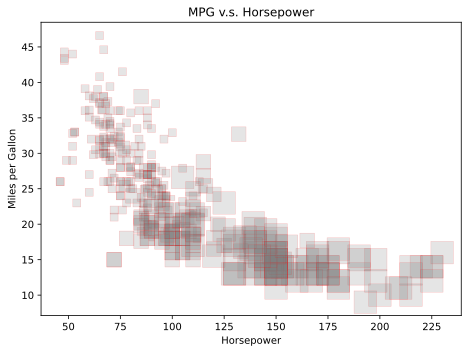

In [6]:
x = np.array(cars["Horsepower"])
y = np.array(cars["Miles_per_Gallon"])
cylinders = np.array(cars["Cylinders"])
cylinders = cylinders ** 3  # シリンダ数＝サイズとすると小さすぎるので大きくする

fig, ax = plt.subplots(constrained_layout=True)
ax.scatter(
    x,
    y,
    marker="s",
    s=cylinders,
    alpha=0.2,
    c="gray",
    edgecolors="red",
    linewidth=0.5,
)
ax.xaxis.set_label_text("Horsepower")
ax.yaxis.set_label_text("Miles per Gallon")
ax.set_title("MPG v.s. Horsepower")
plt.show()

### 量的変数を色にマッピングする

マーカーの色についてもサイズと同様に、`x` や `y` と同じ長さの配列を指定することでマーカーごとの色を変更できる。先ほどはサイズに変数をマッピングしたけれど、代わりに色にマッピングすると次のようになる。

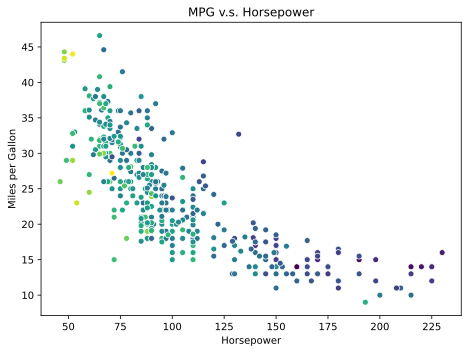

In [7]:
x = np.array(cars["Horsepower"])
y = np.array(cars["Miles_per_Gallon"])
acceleration = np.array(cars["Acceleration"])

fig, ax = plt.subplots(constrained_layout=True)
ax.scatter(
    x,
    y,
    c=acceleration,  # 加速性能の高さを色にマッピング
    edgecolors="white",
    linewidth=0.75,
)
ax.xaxis.set_label_text("Horsepower")
ax.yaxis.set_label_text("Miles per Gallon")
ax.set_title("MPG v.s. Horsepower")
plt.show()

特に変数を色にマッピングした場合は、カラーバーを同時に表示してあげると各データ点がどの程度の値なのかが分かりやすい。カラーバーを表示するには、散布図の Artist （`scatter` 関数の戻り値。詳細は [matplotlib のチュートリアル](https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py)参照）に対して `matplotlib.pyplot.colorbar` 関数を適用すればよい。なお、カラーバーには横軸・縦軸と同様にラベル文字列を設定できるので、色に変数をマッピングした場合は何の変数をマッピングしたのかも伝えたければラベル文字列で表示するのが良い。

スカラー値と RGB 成分で決まる色の対応関係は、カラーマップという仕組みで実現されている。使用するカラーマップを変更すれば色合いを変えることもできる。

- （参考）[matplotlib.colors.Colormap](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.Colormap.html)

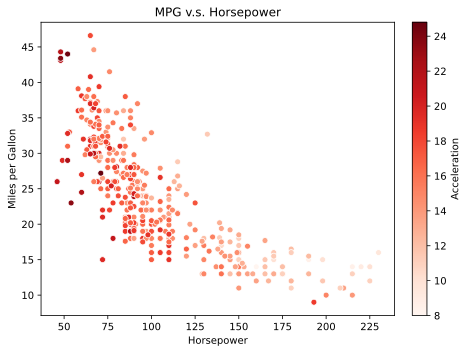

In [8]:
x = np.array(cars["Horsepower"])
y = np.array(cars["Miles_per_Gallon"])
acceleration = np.array(cars["Acceleration"])

fig, ax = plt.subplots(constrained_layout=True)
points = ax.scatter(
    x,
    y,
    c=acceleration,  # 加速性能の高さを色にマッピング
    edgecolors="white",
    linewidth=0.75,
    cmap="Reds",  # カラーマップ "Reds" を使用
)
colorbar = plt.colorbar(points)  # カラーバーを表示
colorbar.set_label("Acceleration")  # カラーバーの説明を描画
ax.xaxis.set_label_text("Horsepower")
ax.yaxis.set_label_text("Miles per Gallon")
ax.set_title("MPG v.s. Horsepower")
plt.show()

### 質的変数を色にマッピングする

カラーマップはスカラー値と色を対応付ける仕組みなので、質的変数を直接色にマッピングすることはできない。基本的には Ordinal Encoding で数値化すれば良いのだけれど、その場合に量的変数をマッピングしたときのようにカラーバーを表示しても嬉しくないだろう。凡例に色付きで当該変数（要因）の水準を並べる形がよく見かける良い例だけれど、これは matplotlib では少々実現に手間がかかる。

（ちなみに seaborn や altair であれば簡単に書けるので、それらに切り替えるという手もある）

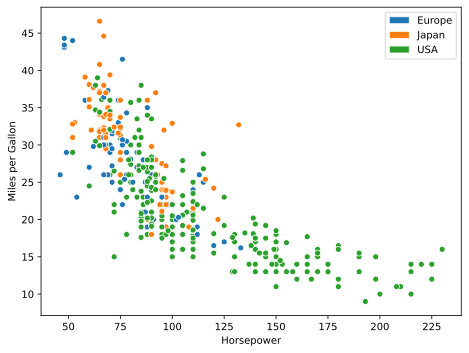

In [9]:
from matplotlib.patches import Patch

x = np.array(cars["Horsepower"])
y = np.array(cars["Miles_per_Gallon"])

# 色にマッピングする質的変数に関する処理
origin = np.array(cars["Origin"])
origin_names = np.unique(origin)  # 重複無く昇順で値を抽出
origin_indices = np.array(        # originの各値が「origin_namesの何番目か」を求める
    [origin_names.searchsorted(o) for o in origin]
)
cmap = plt.colormaps["tab10"]               # 離散カラーマップの tab10 を取得
colors = [cmap(i) for i in origin_indices]  # 各データ点の色を決定
patches = [                                 # 凡例描画用に各水準の色で塗った図形を用意
    Patch(facecolor=cmap(i), edgecolor="white", linewidth=0.75)
    for i, _ in enumerate(origin_names)
]

fig, ax = plt.subplots(constrained_layout=True)
ax.scatter(
    x,
    y,
    c=colors,  # 色成分のリストで個々のデータ点の色を指定
    edgecolor="white",
    linewidth=0.75,
)
ax.xaxis.set_label_text("Horsepower")
ax.yaxis.set_label_text("Miles per Gallon")
ax.legend(patches, origin_names)
plt.show()

## お手軽メソッド `plot` を使う方法

Axes の `plot` メソッドに `.` や `o` といったマークを表すコードを指定すれば手早く散布図を描くことができる。ただし、凝った描画はできないため報告用に使うプロットなどであれば最初から `scatter` を使った方が良いかもしれない。

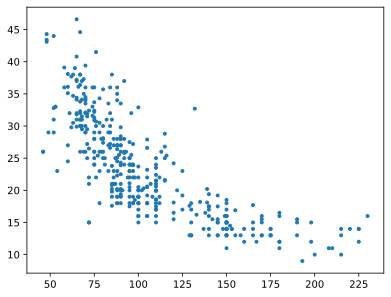

In [10]:
x = np.array(cars["Horsepower"])
y = np.array(cars["Miles_per_Gallon"])

fig, ax = plt.subplots()
ax.plot(x, y, ".")
plt.show()

## pandas データフレームでプロットする

`scatter` メソッドは数値配列を受け取る代わりに pandas データフレームの列名を文字列で指定するスタイルでの呼び出しにも対応している。具体的には `data` 引数にデータフレームを渡しておけば、`x`, `y` などに列名を文字列で渡せるようになる。ただし、基本的には数値配列を指定する場合との互換性を考えているのか、「`x` に指定した列名が自動的に横軸ラベルとして表示される」といった比較的実現が容易な便利な動作は行われない。普段からデータフレームを主に使っているのであれば、この使い方を覚えるよりも seaborn や altair などの使い方を覚えた方が良いかもしれない。

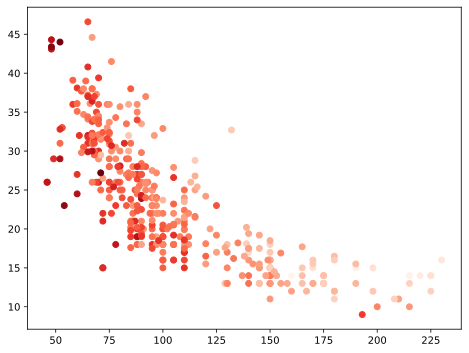

In [11]:
fig, ax = plt.subplots(constrained_layout=True)
ax.scatter(
    x="Horsepower",
    y="Miles_per_Gallon",
    c="Acceleration",
    cmap="Reds",
    data=cars,
)
plt.show()

以上。